In [66]:
import pandas as pd

df = pd.read_csv('fastfood.csv')

# data type
print(df.dtypes)


address        object
city           object
country        object
keys           object
latitude      float64
longitude     float64
name           object
postalCode    float64
province       object
websites       object
dtype: object


In [67]:
# missing values
print(df.isnull().sum())


address         0
city            0
country         0
keys            0
latitude        0
longitude       0
name            0
postalCode    115
province        0
websites      465
dtype: int64


In [68]:
# cordenadas
invalid_lat = df[(df['latitude'] < -90) | (df['latitude'] > 90)]
invalid_long = df[(df['longitude'] < -180) | (df['longitude'] > 180)]

print("Invalid Latitude Rows:", invalid_lat)
print("Invalid Longitude Rows:", invalid_long)


Invalid Latitude Rows: Empty DataFrame
Columns: [address, city, country, keys, latitude, longitude, name, postalCode, province, websites]
Index: []
Invalid Longitude Rows: Empty DataFrame
Columns: [address, city, country, keys, latitude, longitude, name, postalCode, province, websites]
Index: []


In [69]:
# postal codes invalidos
invalid_postal = df[df['postalCode'] > 99999]  # assuming postal codes are at most 5 digits
print("Invalid Postal Code Rows:", invalid_postal)


Invalid Postal Code Rows: Empty DataFrame
Columns: [address, city, country, keys, latitude, longitude, name, postalCode, province, websites]
Index: []


In [70]:
# duplicados
duplicates = df[df.duplicated()]
print("Duplicate Rows:", duplicates)


Duplicate Rows: Empty DataFrame
Columns: [address, city, country, keys, latitude, longitude, name, postalCode, province, websites]
Index: []


In [71]:
# outliers
print(df.describe())


       latitude      longitude     postalCode  
count  10000.000000  10000.000000   9885.000000
mean      37.552195    -91.056132  52446.127162
std        5.050275     18.556339  26597.628786
min       -6.244273   -159.378915   1020.000000
25%       34.028706    -97.412631  30513.000000
50%       38.298216    -87.660930  48150.000000
75%       41.116765    -81.458351  75964.000000
max       64.840240    123.012361  99801.000000


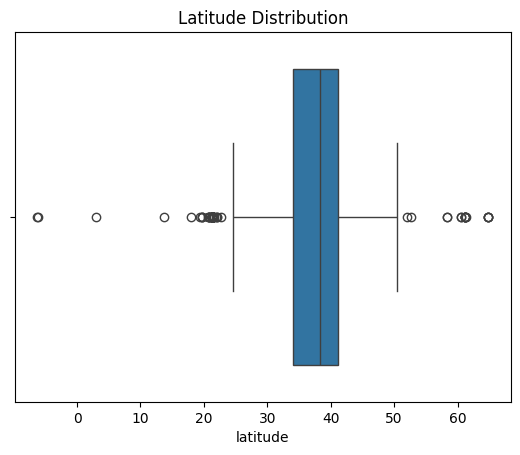

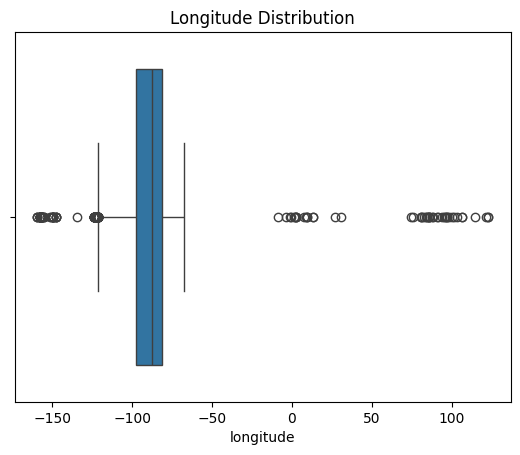

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# boplot outliers
sns.boxplot(x=df['latitude'])
plt.title("Latitude Distribution")
plt.show()

sns.boxplot(x=df['longitude'])
plt.title("Longitude Distribution")
plt.show()


In [73]:
# count
province_counts = df['province'].value_counts()

# count basico
print(province_counts)


province
CA         676
TX         634
OH         543
FL         471
IN         379
IL         363
NC         358
GA         347
MO         334
KY         332
VA         327
PA         283
NY         269
MI         251
TN         245
SC         238
LA         237
AL         236
WA         209
OK         208
AZ         208
WI         186
IA         166
UT         159
MD         159
CO         158
NJ         151
AR         151
NM         149
MN         148
NV         135
MA         131
OR         114
SD         105
KS         103
ID          99
CT          96
WV          93
NE          92
MS          82
ND          50
ME          44
VT          43
WY          41
HI          40
NH          36
DE          32
MT          25
RI          24
DC          21
AK          14
Co Spgs      5
Name: count, dtype: int64


In [74]:

# drop country
df.drop(columns=['country'], inplace=True)

# Convert postalCode to string to avoid precision issues
df['postalCode'] = df['postalCode'].astype(str).str.replace('.0', '', regex=False)

# missing values 
df['postalCode'].fillna('Unknown', inplace=True)

# missing values
df['websites'].fillna('Not Available', inplace=True)

# normalizacao states
us_states = {  
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',  
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',  
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',  
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',  
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',  
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',  
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',  
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',  
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'  
}
df['province'] = df['province'].replace(us_states)

# rename
df.rename(columns={'province': 'state'}, inplace=True)

# dicionario
state_abbr_to_name = {v: k for k, v in us_states.items()}  # Swap keys and values

# trocar abreviacoes por nome state
df['state'] = df['state'].replace(state_abbr_to_name)

print("State abbreviations replaced with full names and saved as 'fastfood_full_states.csv'")

df.drop(columns=['postalCode', 'address', 'city', 'keys', 'websites'], inplace=True)

# reordernar colunas
df = df[['name', 'state', 'latitude', 'longitude']]

# save dataset
df.to_csv('novo_fastfood.csv', index=False)

print("Dataset cleaned and saved as 'novo_fastfood.csv'")


State abbreviations replaced with full names and saved as 'fastfood_full_states.csv'
Dataset cleaned and saved as 'novo_fastfood.csv'


C:\Users\Miguel\AppData\Local\Temp\ipykernel_20188\174381861.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['postalCode'].fillna('Unknown', inplace=True)
C:\Users\Miguel\AppData\Local\Temp\ipykernel_20188\174381861.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [75]:
df = pd.read_csv('novo_fastfood.csv') 

print(df.head(20).to_markdown())


|    | name                          | state          |   latitude |   longitude |
|---:|:------------------------------|:---------------|-----------:|------------:|
|  0 | McDonald's                    | Texas          |    32.9065 |   -97.0369  |
|  1 | Del Taco                      | Nevada         |    36.2391 |  -115.168   |
|  2 | Mcdonald's                    | Illinois       |    38.593  |   -89.9554  |
|  3 | The Agora                     | North Carolina |    35.9112 |   -79.0575  |
|  4 | Taco Bell                     | Wisconsin      |    43.1379 |   -88.2437  |
|  5 | Alice's                       | Illinois       |    43.6159 |    13.5301  |
|  6 | Mariu Kebabberia Gastronomica | Virginia       |    45.451  |     9.19847 |
|  7 | McDonald's                    | Illinois       |    43.5227 |    13.252   |
|  8 | McDonald's                    | Pennsylvania   |    39.1611 |   -78.1555  |
|  9 | Mcdonald's                    | Virginia       |    36.7898 |   -79.3945  |
| 10